In [34]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [33]:
# Load the audio file (replace with your actual file path)
audio_file_path = "audio_test.mp3"
y, sr = librosa.load(audio_file_path)

# Play the audio to test the loading
ipd.Audio(y, rate=sr)

# Calculate the RMS Energy and Duration

In [35]:
# Set a threshold (adjust as needed)
threshold_db = -50

# Calculate RMS energy (loudness) of the audio
rms_energy = librosa.feature.rms(y=y)[0]

# Transform you desired threshold to amplitude
threshold_energy = librosa.db_to_amplitude(threshold_db)

# Identify speaking segments
speaking_segments = (rms_energy > librosa.db_to_amplitude(threshold_db)).astype(int)

# Calculate speaking time in seconds
frame_duration = librosa.get_duration(y=y, sr=sr) / len(rms_energy)
speaking_time_seconds = sum(speaking_segments) * frame_duration

print(f"Estimated speaking time: {speaking_time_seconds:.2f} seconds")


Estimated speaking time: 4.10 seconds


# Draw the power plot and threshold

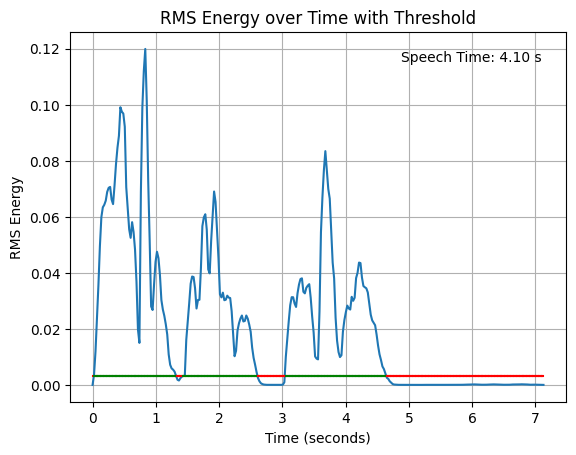

In [48]:
# Create a time axis (in seconds)
time_axis = np.arange(0, len(rms_energy)) * librosa.get_duration(y=y, sr=sr) / len(rms_energy)

# Create the plot
fig, ax = plt.subplots()
ax.plot(time_axis, rms_energy, label="RMS Energy")

# Color segments above and below threshold
for i in range(len(rms_energy) - 1):
    clr = 'g' if rms_energy[i] > threshold_energy else 'r'

    ax.plot([time_axis[i], time_axis[i+1]], [threshold_energy, threshold_energy], color=clr)

# Draw text with the amount of speaking time in seconds
ax.text(0.95, 0.95, f"Speech Time: {speaking_time_seconds:.2f} s",
        transform=ax.transAxes, ha='right', va='top', fontsize=10, color='black')

ax.set(title="RMS Energy over Time with Threshold", xlabel="Time (seconds)", ylabel="RMS Energy")
ax.grid(True)
plt.show()
